In [2]:
import pandas as pd
import matplotlib.pyplot as plt


Data Cleaning

In [3]:
data = 'C:/Users/yasht/Downloads/datasets (4)/datasets/walmart_data.csv'

In [4]:
df = pd.read_csv(data)

In [5]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [6]:
df.shape

(550068, 10)

In [7]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [8]:
df.nunique()


User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [9]:
df['Gender'] = df['Gender'].astype('category')

In [10]:
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Age'] = df['Age'].astype('category')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')


In [11]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


In [12]:
def map_status(value):
    if value == 0:
        return 'Unmarried'
    elif value == 1:
        return 'Married'
    else:
        return 'unknown'

In [13]:
df['Marital_Status'] = df['Marital_Status'].apply(map_status)

In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


Question - Customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

Data Anlaysis

In [15]:
q1 = df.groupby(by = ['Gender','Age'])['Purchase'].sum().to_frame().reset_index()

In [16]:
q1

,Gender,Age,Purchase
0,F,0-17,42385978
1,F,18-25,205475842
2,F,26-35,442976233
3,F,36-45,243438963
4,F,46-50,116706864
5,F,51-55,89465997
6,F,55+,45782765
7,M,0-17,92527205
8,M,18-25,708372833
9,M,26-35,1588794345


In [45]:
pivot_df = q1.pivot(index="Age", columns="Gender", values="Purchase")
pivot_df


Gender,F,M
Age,,
0-17,42385978,92527205
18-25,205475842,708372833
26-35,442976233,1588794345
36-45,243438963,783130921
46-50,116706864,304136539
51-55,89465997,277633647
55+,45782765,154984610


<Figure size 1656x1224 with 0 Axes>

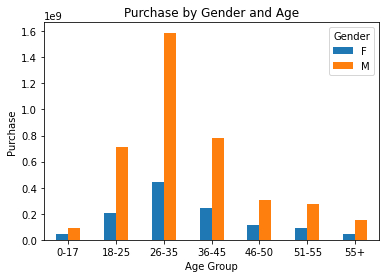

In [19]:
plt.figure(figsize=(23,17))


ax = pivot_df.plot(kind="bar")
plt.title("Purchase by Gender and Age")
plt.xticks(rotation= 'horizontal')
plt.xlabel("Age Group")
plt.ylabel("Purchase")
plt.show()

Insight 1: The graph clearly illustrates that males are the predominant purchasers across all age categories. This trend suggests a consistent buying pattern among males regardless of their age group.

In [20]:
q2 = df.groupby(by = ['Occupation', 'Gender'])['Purchase'].sum().to_frame().reset_index()

In [21]:

pivot_df_2 = q2.pivot(index="Occupation", columns="Gender", values="Purchase")
pivot_df_2.head(5)

Gender,F,M
Occupation,,
0,159883833,475523125
1,152806726,271807418
2,72569470,165459113
3,71707639,90294529
4,152264321,513980163


<Figure size 7200x5544 with 0 Axes>

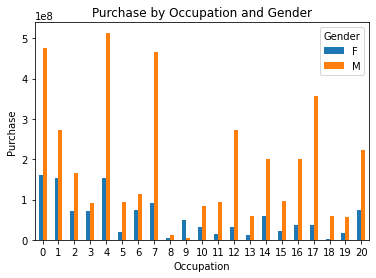

In [22]:
plt.figure(figsize=(100,77))
ax = pivot_df_2.plot(kind="bar")
plt.title("Purchase by Occupation and Gender")
plt.xticks(rotation= 'horizontal')
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.show()

Insight 2: When examining purchasing behavior based on different occupations, a distinct pattern emerges. Occupation categories 4, 0, and 7 consistently show the highest purchase rates across various groups. On the contrary, occupation categories 8, 9, and 18 consistently exhibit the lowest purchase orders in both categories. This insight suggests a potential link between specific occupations and their propensity for making purchases, which could be valuable for targeted marketing strategies and product offerings.



In [23]:
q3 = df.groupby(by = ['City_Category', 'Gender'])['Purchase'].sum().to_frame().reset_index()
pivot_df_3 = q3.pivot(index="City_Category", columns="Gender", values="Purchase")
pivot_df_3

Gender,F,M
City_Category,,
A,306329915,1010141746
B,493617008,1621916597
C,386285719,1277521757


<Figure size 7200x5544 with 0 Axes>

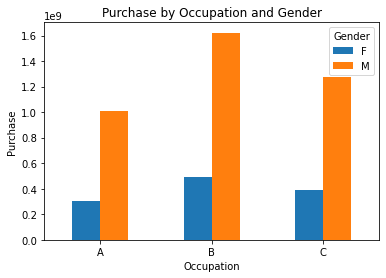

In [25]:
plt.figure(figsize=(100,77))
ax = pivot_df_3.plot(kind="bar")
plt.title("Purchase by Occupation and Gender")
plt.xticks(rotation= 'horizontal')
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.show()

Insight 3: Examining purchase patterns across different cities reveals a distinct hierarchy. City B emerges as the top purchaser among both males and females, closely followed by City C and City A. This consistent trend across genders and cities suggests that City B might have unique characteristics or factors that contribute to higher purchasing activity. 

In [26]:
q4 = df.groupby(by = ['Stay_In_Current_City_Years','Age'])['Purchase'].sum().to_frame().reset_index()
pivot_df_4 = q4.pivot(index="Stay_In_Current_City_Years", columns="Age", values="Purchase")

<Figure size 1080x864 with 0 Axes>

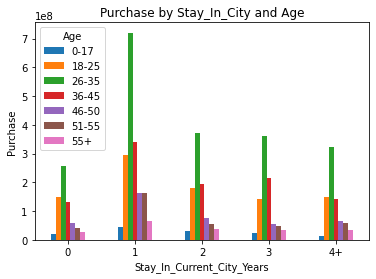

In [28]:
plt.figure(figsize=(15,12))
pivot_df_4.plot(kind = 'bar')
plt.title("Purchase by Stay_In_City and Age")
plt.xticks(rotation= 'horizontal')
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.show()

Insight 4: it becomes evident that the age group 26-35 consistently records the highest purchase orders across all categories. The 36-45 age group exhibits a stable trend with sustained purchase activity for residents staying in the city for 2 and 3 years. In contrast, the 18-25 age group displays a fluctuating pattern, indicating higher purchase orders during the initial (0 years) and later stages (4 years) of city residence

In [31]:
q5 = df.groupby(by = ['Marital_Status','Age'])['Purchase'].sum().to_frame().reset_index()
pivot_df_5 = q5.pivot(index="Marital_Status", columns="Age", values="Purchase")
pivot_df_5.sort_values(by = 'Marital_Status', ascending= False)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Marital_Status,,,,,,,
Married,0,189928073,798440476,402459124,307185043,263307250,125565329
Unmarried,134913183,723920602,1233330102,624110760,113658360,103792394,75202046


<Figure size 1224x864 with 0 Axes>

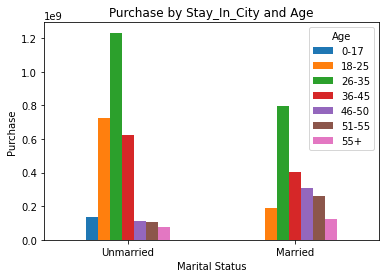

In [33]:
plt.figure(figsize=(17,12))
pivot_df_5.plot(kind = 'bar')
plt.title("Purchase by Stay_In_City and Age")
plt.xticks(rotation = 'horizontal')
plt.xlabel("Marital Status")
plt.ylabel("Purchase")
plt.show()

Insight 5:  Across the age categories of 18-25, 26-35, and 36-45, unmarried individuals consistently exhibit the highest purchase orders. Notably, a significant decline is observed in the purchase orders of unmarried individuals after the 36-45 age group. This intriguing trend suggests a potential shift in priorities or life circumstances that affects purchasing behavior, which could be a valuable focus for further investigation and targeted marketing strategies.

In [34]:
df_prod_cat = df.groupby(by = ['Product_Category'], axis= 0)['Purchase'].agg(sum).to_frame().reset_index().sort_values(by = 'Purchase', ascending= False).head(7)
df_prod_cat

,Product_Category,Purchase
0,1,1910013754
4,5,941835229
7,8,854318799
5,6,324150302
1,2,268516186
2,3,204084713
15,16,145120612


In [35]:
df_prod_cont = df.groupby(by = ['Product_Category'])['User_ID'].count().to_frame().reset_index().sort_values(by = 'User_ID', ascending= False).head(7)
df_prod_cont 

,Product_Category,User_ID
4,5,150933
0,1,140378
7,8,113925
10,11,24287
1,2,23864
5,6,20466
2,3,20213


In [36]:
df_prod_cont 

,Product_Category,User_ID
4,5,150933
0,1,140378
7,8,113925
10,11,24287
1,2,23864
5,6,20466
2,3,20213


In [43]:
df_6 = df_prod_cat.merge(df_prod_cont, how = 'inner', on = 'Product_Category')
df_6.rename(columns={'User_ID': 'Count_of_User'})

,Product_Category,Purchase,Count_of_User
0,1,1910013754,140378
1,5,941835229,150933
2,8,854318799,113925
3,6,324150302,20466
4,2,268516186,23864
5,3,204084713,20213


Text(0, 0.5, 'Count of User_ID')

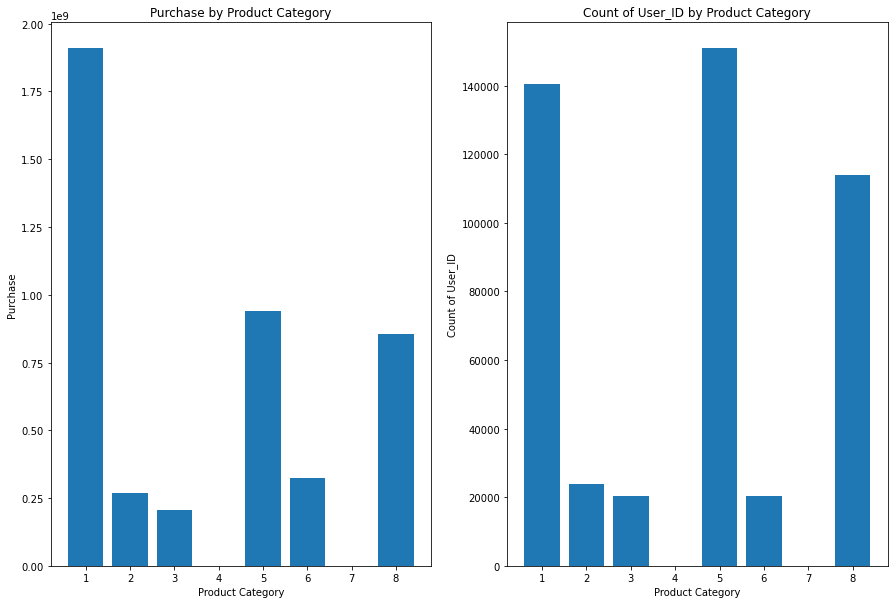

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

# Plot 'Purchase' on the left subplot
axs[0].bar(df_6['Product_Category'], df_6['Purchase'])
axs[0].set_title('Purchase by Product Category')
axs[0].set_xlabel('Product Category')
axs[0].set_ylabel('Purchase')

# Plot 'User_ID' on the right subplot
axs[1].bar(df_6['Product_Category'], df_6['User_ID'])
axs[1].set_title('Count of User_ID by Product Category')
axs[1].set_xlabel('Product Category')
axs[1].set_ylabel('Count of User_ID')


Insight 6: While Product Category 1 appears to have the highest purchase orders, followed by Categories 5 and 8, a closer examination of user counts reveals a discrepancy. Despite the higher purchase orders for Category 1, the user count for Category 5 is actually higher, and Category 8 also exhibits a higher user count than its corresponding purchase orders suggest. This divergence between purchase orders and user counts could indicate varying degrees of engagement or preferences among users within each category, emphasizing the importance of considering both metrics for a comprehensive understanding.


Insight 1: The graph clearly illustrates that males are the predominant purchasers across all age categories. This trend suggests a consistent buying pattern among males regardless of their age group.




Insight 2: When examining purchasing behavior based on different occupations, a distinct pattern emerges. Occupation categories 4, 0, and 7 consistently show the highest purchase rates across various groups. On the contrary, occupation categories 8, 9, and 18 consistently exhibit the lowest purchase orders in both categories. This insight suggests a potential link between specific occupations and their propensity for making purchases, which could be valuable for targeted marketing strategies and product offerings.





Insight 3: Examining purchase patterns across different cities reveals a distinct hierarchy. City B emerges as the top purchaser among both males and females, closely followed by City C and City A. This consistent trend across genders and cities suggests that City B might have unique characteristics or factors that contribute to higher purchasing activity. 




Insight 4: it becomes evident that the age group 26-35 consistently records the highest purchase orders across all categories. The 36-45 age group exhibits a stable trend with sustained purchase activity for residents staying in the city for 2 and 3 years. In contrast, the 18-25 age group displays a fluctuating pattern, indicating higher purchase orders during the initial (0 years) and later stages (4 years) of city residence



Insight 5:  Across the age categories of 18-25, 26-35, and 36-45, unmarried individuals consistently exhibit the highest purchase orders. Notably, a significant decline is observed in the purchase orders of unmarried individuals after the 36-45 age group. This intriguing trend suggests a potential shift in priorities or life circumstances that affects purchasing behavior, which could be a valuable focus for further investigation and targeted marketing strategies.



Insight 6: While Product Category 1 appears to have the highest purchase orders, followed by Categories 5 and 8, a closer examination of user counts reveals a discrepancy. Despite the higher purchase orders for Category 1, the user count for Category 5 is actually higher, and Category 8 also exhibits a higher user count than its corresponding purchase orders suggest. This divergence between purchase orders and user counts could indicate varying degrees of engagement or preferences among users within each category, emphasizing the importance of considering both metrics for a comprehensive understanding.